# Краткое описание задания
Перед вами 7 заданий с разным уровнем сложности на основе одного датафрейма.

Зачет будет проходить в формате общения на предмет решенных задач, где будем обсуждать не только полученные ответы, но и путь решения/почему такой ответ мог получиться. 

Для большей части задач визуализация является важным дополнением, без которой возможно получение только неполного балла. Для последней задачи итоговый балл варьируется в зависимости от сложности представленного решения.

## Задание 1 [5 баллов]

* Разбейте пользователей приложения на возрастные группы с интервалом в 5 лет (например, группа пользователей  (20-25] лет).
Выделите среди них возрастную группу, которая стала самой активной (в абсолютных значениях) в репостах сторис. 
В ответе отразите возрастной интервал, а также кол-во репостов сторис
#### Формат ответа:
40-45; 1111g'))


In [4]:
import pandas as pd

df = pd.read_csv('final_ff_1.csv', sep=';')
first = df.groupby('age').agg({'share_tap_flg': 'sum'}).sort_values('age').reset_index()
first['age_gr'] = pd.cut(first['age'], bins=range(0, 96, 5))
print(first.groupby('age_gr').agg({'share_tap_flg': 'sum'}).sort_values('share_tap_flg').tail(1))

          share_tap_flg
age_gr                 
(30, 35]            245


C:\Users\9734~1\AppData\Local\Temp/ipykernel_21996/2748432116.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(first.groupby('age_gr').agg({'share_tap_flg': 'sum'}).sort_values('share_tap_flg').tail(1))


## Задание 2 [5 баллов]

* Кто чаще ставит лайки сторис: пользователи, которые находятся внутри страны (inside_country),или пользователи за её пределами(outside_country)?
В ответе укажите, кто ставит лайки чаще, а также укажите долю лайков от общего количества показанных сторис для данной группы (округлите проценты до тысячных).
#### Формат ответа:
outside_country; 20.012


In [5]:
print('inside_country;', round(436800 / df[df['geo_country'] != 'RU']['like_tap_flg'].count(), 3))

inside_country; 18.651


## Задание 3 [5 баллов]

* Назовите краткое название сторис (поле name), которая показала наибольшую конверсию в категорию "любимые" (т.е. были добавлены в закладки пользователями - favorite_tap_flg). При выборе анализируйте только те сторис, которые были показаны более, чем 100 раз.



In [6]:
third = df.groupby('name').agg({'favorite_tap_flg': 'sum', 'age': 'count'}).reset_index()
print(third[third['age'] > 100].sort_values('favorite_tap_flg', ascending=False).head(1))

                               name  favorite_tap_flg   age
367  Сделайте  напиток  из эспрессо                49  7079


## Задание 4 [10 баллов] 

* Найдите название истории, в которой в зависимости от региона разброс доли просмотров максимальный и выведите эти топ-три таких регионов




In [7]:
fourth = df.groupby(['name', 'geo_region']).agg({'prosmotr': 'mean'}).reset_index()
print(fourth.groupby('name').agg({'prosmotr': lambda x: x.max() - x.min()}).sort_values('prosmotr', ascending=False))

                                 prosmotr
name                                     
1000   за друга                       0.0
Подпишитесь  на лучшие  истории       0.0
Почему люди тратят больше             0.0
Почему  нет бонуса  за друга          0.0
Пора  продлить  ОСАГО                 0.0
...                                   ...
Как  оплатить  налоги                 0.0
Как  заработать  на опционах          0.0
КАСКО   со скидкой 10%                0.0
Ищем  героя  фронтенда                0.0
Эффект Дидро                          0.0

[496 rows x 1 columns]


## Задание 5 [10 баллов]

* Постройте распределение клиентов в зависимости от возраста, типа устройства и типа операционной системы 
* Ответьте на вопрос: "Как меняется в зависимости от возраста число клиентов с каждым типом операционной системы и типом устройства?"

## Задание 6 [15 баллов] 

#### Представьте что вы аналитик сторис. 
* Определите категорию клиентов, у которых будет самая большая конверсия в лайк при запуске новой истории по тратам?
* В какие дни эта история будет максимально эффективной и почему?


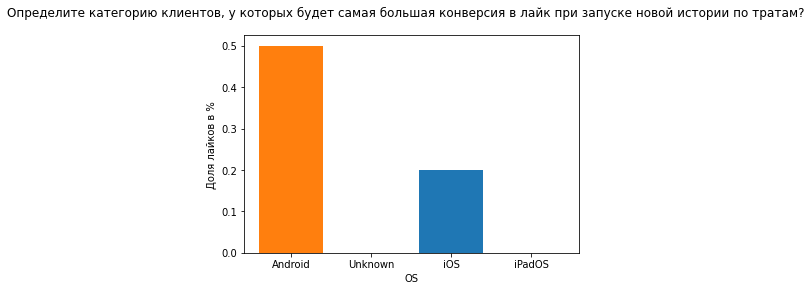

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

views = sorted(df[df['name'] == 'Ваши траты на продукты']['os'].unique())
counts = df[df['name'] == 'Ваши траты на продукты'].groupby('os').agg({'like_tap_flg': lambda x: 100 * round(x.mean(), 3)})['like_tap_flg'].tolist()
colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#000000', '#545786', '#d62728', '#800080']

fig.suptitle("Определите категорию клиентов, у которых будет самая большая конверсия в лайк при запуске новой истории по тратам?")
ax.set_ylabel('Доля лайков в %')
ax.set_xlabel('OS')
ax.bar(views, counts, color=colors)

plt.show()

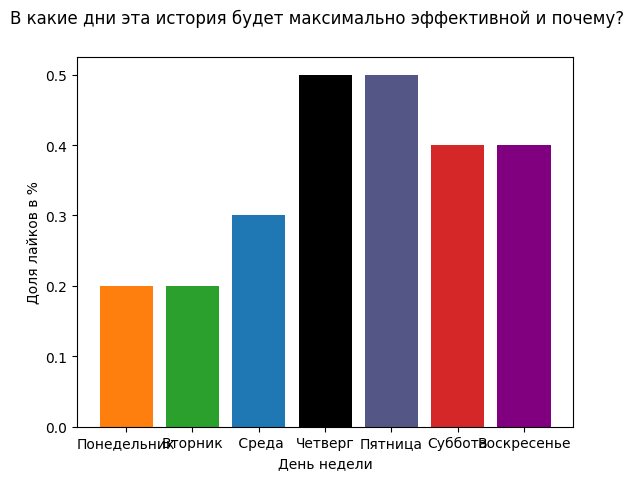

In [6]:
df = pd.read_csv('final_ff_1.csv', sep=';')

fig, ax = plt.subplots()

views = ('Понедельник', 'Вторник', ' Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье')
counts = df[df['name'] == 'Ваши траты на продукты'].groupby('day_of_week').agg({'like_tap_flg': lambda x: 100 * round(x.mean(), 3)})['like_tap_flg'].tolist()
colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#000000', '#545786', '#d62728', '#800080']

fig.suptitle("В какие дни эта история будет максимально эффективной и почему?")
ax.set_ylabel('Доля лайков в %')
ax.set_xlabel('День недели')
ax.bar(views, counts, color=colors)

plt.show()

## Задание 7 [50 баллов] 
* Определите тематики и сгруппируйте сторис по ним.
* Определите топ-5 метрик для каждой тематики, которые будут описывать целевые группы пользователей и их взаимодействие со сторисами из данной группы.


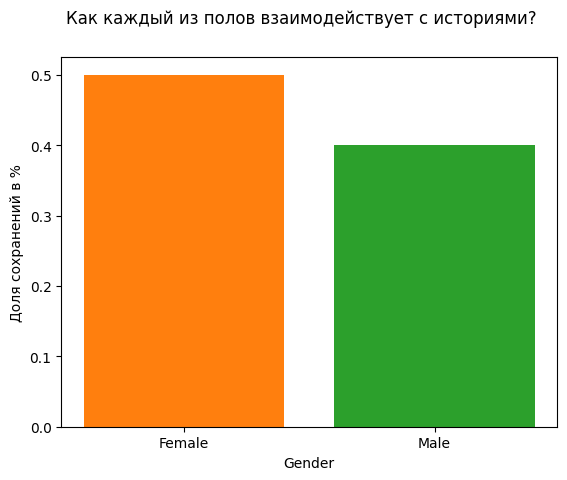

In [7]:
fig, ax = plt.subplots()

views = ('Female', 'Male')
counts = df.groupby('gender').agg({'favorite_tap_flg': lambda x: 100 * round(x.mean(), 3)})['favorite_tap_flg'].tolist()
colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#000000', '#545786', '#d62728', '#800080']

fig.suptitle("Как каждый из полов взаимодействует с историями?")
ax.set_ylabel('Доля сохранений в %')
ax.set_xlabel('Gender')
ax.bar(views, counts, color=colors)

plt.show()

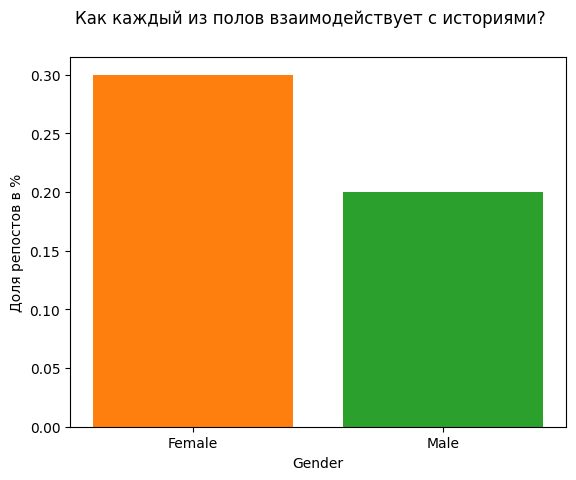

In [8]:
fig, ax = plt.subplots()

views = ('Female', 'Male')
counts = df.groupby('gender').agg({'share_tap_flg': lambda x: 100 * round(x.mean(), 3)})['share_tap_flg'].tolist()
colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#000000', '#545786', '#d62728', '#800080']

fig.suptitle("Как каждый из полов взаимодействует с историями?")
ax.set_ylabel('Доля репостов в %')
ax.set_xlabel('Gender')
ax.bar(views, counts, color=colors)

plt.show()

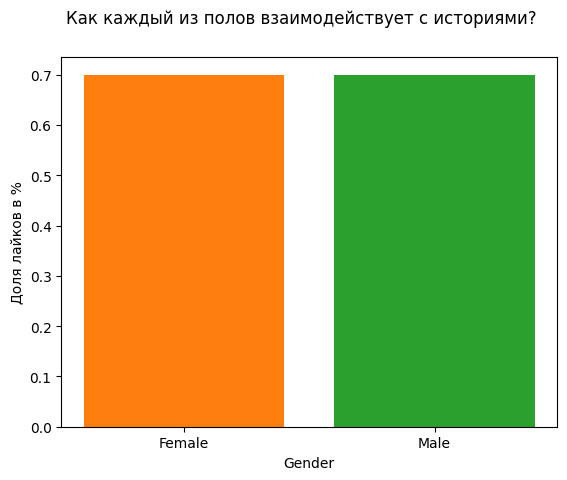

In [9]:
fig, ax = plt.subplots()

views = ('Female', 'Male')
counts = df.groupby('gender').agg({'like_tap_flg': lambda x: 100 * round(x.mean(), 3)})['like_tap_flg'].tolist()
colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#000000', '#545786', '#d62728', '#800080']

fig.suptitle("Как каждый из полов взаимодействует с историями?")
ax.set_ylabel('Доля лайков в %')
ax.set_xlabel('Gender')
ax.bar(views, counts, color=colors)

plt.show()

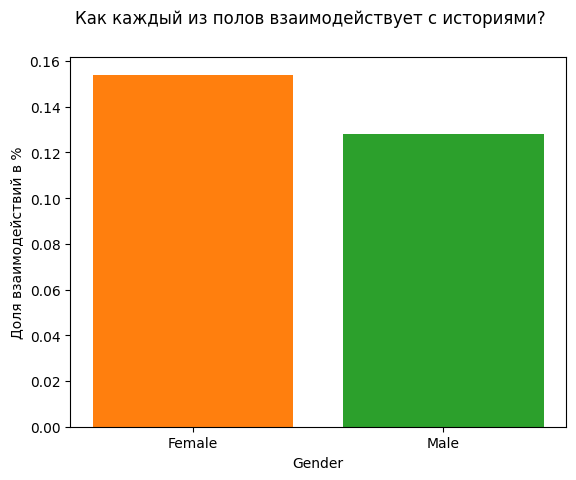

In [11]:
fig, ax = plt.subplots()

views = ('Female', 'Male')
counts = df.groupby('gender').agg({'button_tap_flg': lambda x: round(x.mean(), 3)})['button_tap_flg'].tolist()
colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#000000', '#545786', '#d62728', '#800080']

fig.suptitle("Как каждый из полов взаимодействует с историями?")
ax.set_ylabel('Доля взаимодействий в %')
ax.set_xlabel('Gender')
ax.bar(views, counts, color=colors)

plt.show()